# Heart_Diseases
* ## Paolo Di Simone, Matr: 584638 
* ## Andrea de Donato, Matr: 536795

In [1]:
import pandas as pd

df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [2]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,45,1,1,110,264,0,0,132,0,1.2,2,1
1185,68,1,4,144,193,1,0,141,0,3.4,2,1
1186,57,1,4,130,131,0,0,115,1,1.2,2,1
1187,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1189 non-null   int64  
 1   sex                  1189 non-null   int64  
 2   chest pain type      1189 non-null   int64  
 3   resting bp s         1189 non-null   int64  
 4   cholesterol          1189 non-null   int64  
 5   fasting blood sugar  1189 non-null   int64  
 6   resting ecg          1189 non-null   int64  
 7   max heart rate       1189 non-null   int64  
 8   exercise angina      1189 non-null   int64  
 9   oldpeak              1189 non-null   float64
 10  ST slope             1189 non-null   int64  
 11  target               1189 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.6 KB


In [5]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,0.763667,3.232969,132.138772,210.376787,0.212784,0.698907,139.739277,0.387721,0.923549,1.625736,0.528175
std,9.352961,0.425008,0.935850,18.369251,101.462185,0.409448,0.870489,25.527386,0.487435,1.086464,0.608893,0.499416
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Data Analysis

In [6]:
data = df.copy()
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column 

[0.07818367 0.05975439 0.12964894 0.08004607 0.09150194 0.032669
 0.03992113 0.09366797 0.12651748 0.09279698 0.17529244]


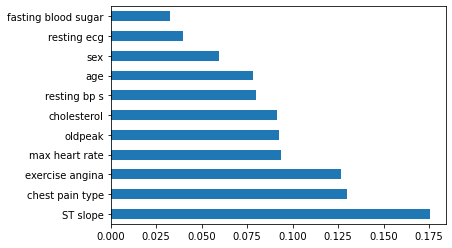

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

<AxesSubplot:>

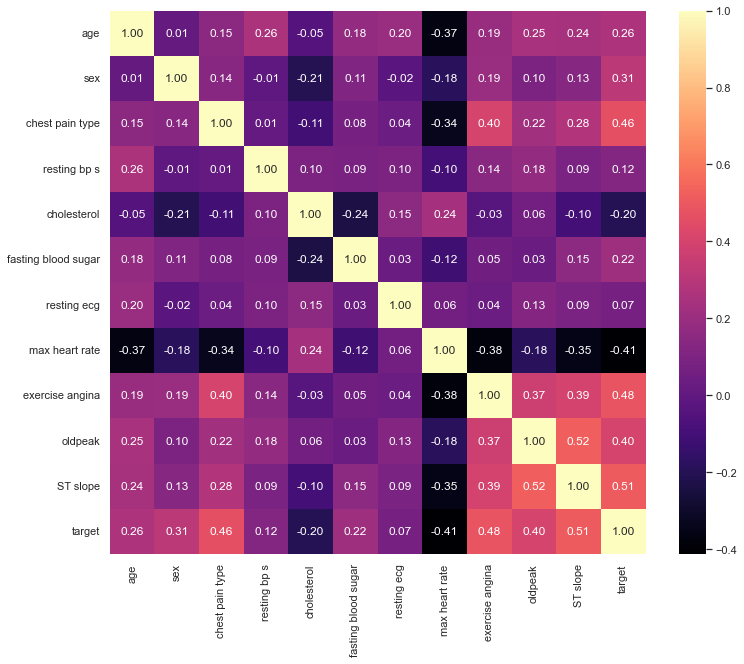

In [8]:
import seaborn as sns
sns.set_theme(style="white")
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

## Data Visualization

In [9]:
df2 = df.copy()

def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

df2['sex'] = df2['sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'

df2['target'] = df2['target'].apply(chng2)

def chng3(cpt):
    if cpt == 1:
        return 'Typical angina'
    elif cpt == 2:
        return 'Atypical angina'
    elif cpt == 3:
        return 'Non-anginal pain'
    else:
        return 'Asymptomatic'

df2['chest pain type'] = df2['chest pain type'].apply(chng3)

def chng4(ea):
    if ea == 1:
        return 'Yes'
    else:
        return 'No'

df2['exercise angina'] = df2['exercise angina'].apply(chng4)


def chng5(re):
    if re == 0:
        return 'Normal'
    elif re == 1:
        return '''ST-T wave
        abnormality '''
    else:
        return '''Left ventricular
        hypertrophy'''

df2['resting ecg'] = df2['resting ecg'].apply(chng5)


def chng6(sts):
    if sts == 1:
        return 'upsloping'
    elif sts == 2:
        return 'flat'
    else:
        return 'downsloping'

df2['ST slope'] = df2['ST slope'].apply(chng6)

Text(0.5, 1.0, 'Gender v/s target\n')

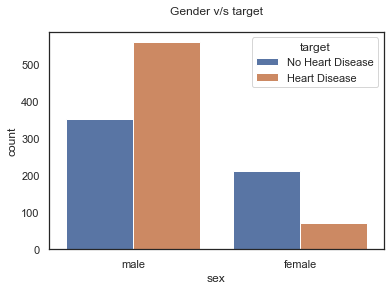

In [10]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

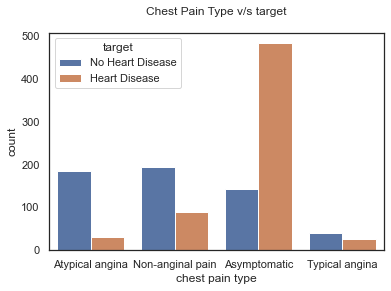

In [11]:
sns.countplot(data= df2, x='chest pain type',hue='target')
plt.title('Chest Pain Type v/s target\n')

Text(0.5, 1.0, 'Exercise Angina v/s target\n')

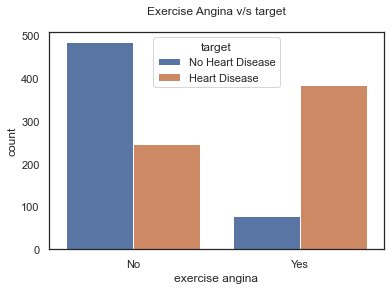

In [12]:
sns.countplot(data= df2, x='exercise angina',hue='target')
plt.title('Exercise Angina v/s target\n')

Text(0.5, 1.0, 'Resting ecg v/s target\n')

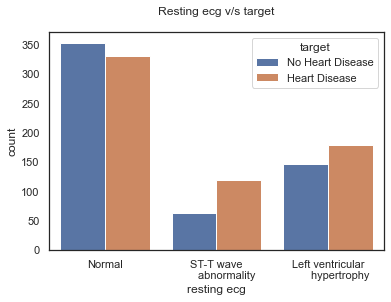

In [13]:
sns.countplot(data= df2, x='resting ecg',hue='target')
plt.title('Resting ecg v/s target\n')

Text(0.5, 1.0, 'ST slope v/s target\n')

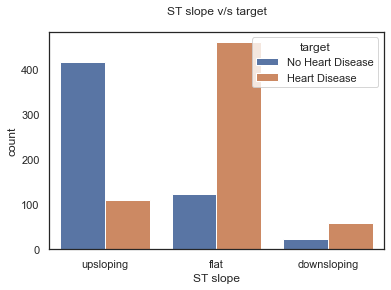

In [14]:
sns.countplot(data= df2, x='ST slope',hue='target')
plt.title('ST slope v/s target\n')

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

<Figure size 1152x504 with 0 Axes>

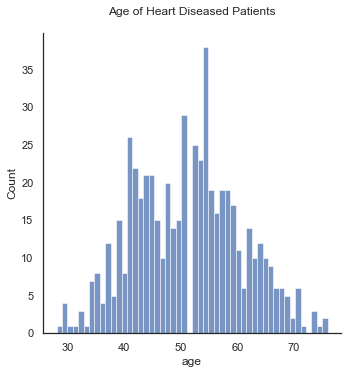

In [15]:
plt.figure(figsize=(16,7))
sns.displot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

<Figure size 1152x504 with 0 Axes>

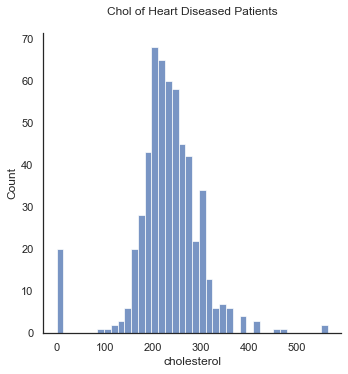

In [16]:
plt.figure(figsize=(16,7))
sns.displot(df[df['target']==0]['cholesterol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

<Figure size 1152x504 with 0 Axes>

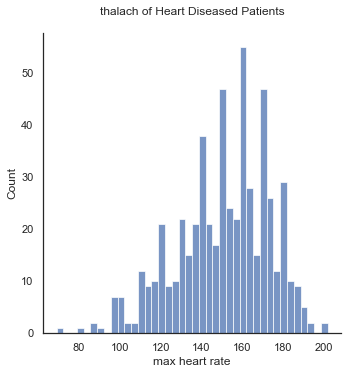

In [17]:
plt.figure(figsize=(16,7))
sns.displot(df[df['target']==0]['max heart rate'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

<AxesSubplot:xlabel='target', ylabel='age'>

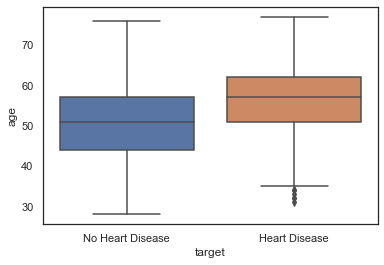

In [18]:
sns.boxplot(data=df2,x='target',y='age')

<AxesSubplot:xlabel='chest pain type', ylabel='max heart rate'>

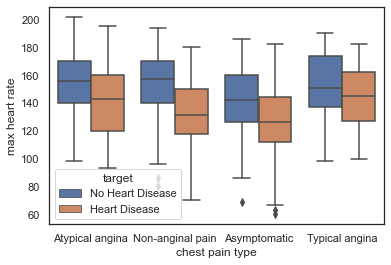

In [19]:
sns.boxplot(data=df2,x='chest pain type',y='max heart rate',hue='target')

## Classificazione Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # splitting default 80-20

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy: 0.8624161073825504
Accuracy on training set: 1.000
Accuracy on test set: 0.862


In [28]:
# Create Decision Tree classifer object with parameter max_depth=10
clf = DecisionTreeClassifier(max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy: 0.8758389261744967
Accuracy on training set: 0.984
Accuracy on test set: 0.876


In [29]:
# Create Decision Tree classifer object with parameter max_depth=15
clf = DecisionTreeClassifier(max_depth=15)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy: 0.8691275167785235
Accuracy on training set: 0.996
Accuracy on test set: 0.869


In [30]:
# Create Decision Tree classifer object with parameter max_depth=5
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy: 0.8489932885906041
Accuracy on training set: 0.896
Accuracy on test set: 0.849


In [22]:
!pip install pydotplus

In [23]:
feature_cols = ['age', 'sex', 'chest pain type', 'resting bp s','cholesterol', 'fasting blood sugar', 'resting ecg ', 'max heart rate','exercise angina', 'oldpeak', 'ST slope']
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols  ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found